In [2]:
# %pip install mysql-connector-python
# %pip install pandas
# %pip install matplotlib
# %pip install tabulate


================= QUESTION 1 =================
Which publisher has the most superheroes?

Publisher            Total Heroes
-----------------  --------------
Marvel Comics                 379
DC Comics                     206
NBC - Heroes                   19
Dark Horse Comics              16
Image Comics                   14
George Lucas                   14
                               13
HarperCollins                   6
Star Trek                       6
SyFy                            5
Team Epic TV                    5
Icon Comics                     4
ABC Studios                     4
IDW Publishing                  4
Shueisha                        4
Wildstorm                       3
Sony Pictures                   2
Hanna-Barbera                   1
South Park                      1
Universal Studios               1
J. K. Rowling                   1
Titan Books                     1
Rebellion                       1
Microsoft                       1
J. R. R. Tolkien         

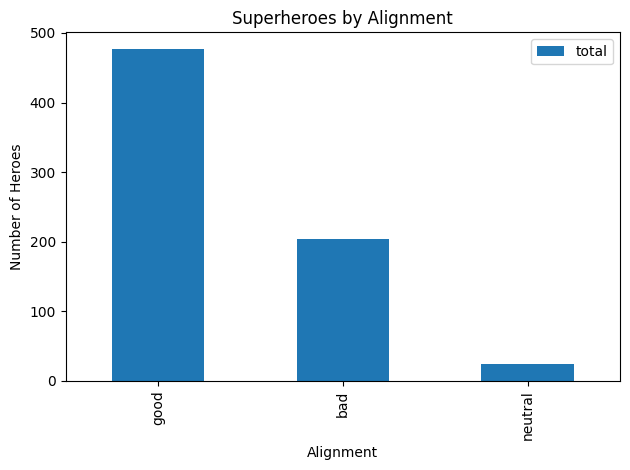

In [ ]:
import mysql.connector
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="MySQL@123",
    database="superheroes"
)

cursor = conn.cursor()

print("\n================= QUESTION 1 =================")
print("Which publisher has the most superheroes?\n")

cursor.execute("""
SELECT publisher, COUNT(*) AS total_heroes
FROM heroes
GROUP BY publisher
ORDER BY total_heroes DESC;
""")
rows = cursor.fetchall()
print(tabulate(rows, headers=["Publisher", "Total Heroes"]))


print("\n================= QUESTION 2 =================")
print("How many superheroes can fly?\n")

cursor.execute("""
SELECT COUNT(*) AS flyers
FROM super_hero_powers
WHERE flight = 'True';
""")
flyers = cursor.fetchone()
print(f"Total heroes that can fly: {flyers[0]}")


print("\n================= QUESTION 3 =================")
print("Top 10 tallest superheroes (with powers shown)\n")

cursor.execute("""
SELECT h.name, h.height,
  CASE WHEN p.super_strength = 'True' THEN 'Yes' ELSE 'No' END AS super_strength,
  CASE WHEN p.flight = 'True' THEN 'Yes' ELSE 'No' END AS can_fly
FROM heroes h
JOIN super_hero_powers p ON h.name = p.hero_names
WHERE h.height IS NOT NULL
ORDER BY h.height DESC
LIMIT 10;
""")

rows = cursor.fetchall()
print(tabulate(rows, headers=["Hero", "Height", "Super Strength", "Can Fly?"]))


print("\n================= QUESTION 4 =================")
print("Which gender has more superheroes with super strength?\n")


cursor.execute("""
SELECT h.gender, COUNT(*) AS strong_heroes
FROM heroes h
JOIN super_hero_powers p ON h.name = p.hero_names
WHERE p.super_strength = 'True'
  AND h.gender IS NOT NULL AND h.gender != '-'
GROUP BY h.gender;
""")
rows = cursor.fetchall()
print(tabulate(rows, headers=["Gender", "Strong Heroes"]))


print("\n================= QUESTION 5 =================")
print("Average height of flying vs non-flying superheroes:\n")

cursor.execute("""
SELECT 
  CASE WHEN p.flight = 'True' THEN 'Yes' ELSE 'No' END AS can_fly,
  AVG(h.height) AS avg_height
FROM heroes h
JOIN super_hero_powers p ON h.name = p.hero_names
GROUP BY can_fly;
""")

rows = cursor.fetchall()
print(tabulate(rows, headers=["Can Fly?", "Average Height"]))


#Graph

print("How many heroes are Good, Bad, or Neutral?\n")

query_alignment = """
SELECT alignment, COUNT(*) AS total
FROM heroes
WHERE alignment IS NOT NULL AND alignment != '-'
GROUP BY alignment
ORDER BY total DESC;
"""

# reading directly into Pandas DataFrame
df_alignment = pd.read_sql(query_alignment, conn)

print(df_alignment)

# bar chart
df_alignment.plot(kind="bar", x="alignment", y="total")
plt.title("Superheroes by Alignment")
plt.xlabel("Alignment")
plt.ylabel("Number of Heroes")
plt.tight_layout()
plt.show()


cursor.close()
conn.close()

